# Analysis of annual burden in basleine Nigeria scenarios

Simplest analysis - looking at burden by year for each of the 4 Nigeria scenarios and plotting

In [202]:
# First load some libraries, including History Matching
%load_ext autoreload
%autoreload 2

import os, glob, re, sys, json
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import pickle
from IPython.display import display
import seaborn as sns
sys.path.append(os.path.dirname(os.getcwd()))
from PythonHelperFunctions.utils import load_output_path
sns.set(font_scale=2)
sns.set_style("white")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [203]:
def fix_glob(pth):
    return re.sub('([\[\]])','[\\1]', pth)

### Just get the outputs and look at doubling time and total incidence

In [204]:
def process_output_file(outpath=None):
    with open(os.path.join(outpath, 'results.pkl'), 'rb') as file:
        raw = pickle.load(file)
    processed = pd.DataFrame(columns=['SimID', 'Sample', 'Base_Infectivity', 'New Infections'])
    i = 0
    for x, y in raw.items():
        i = i+1
        processed = processed.append(pd.Series({'SimID': y['sim_id'], 
                    'Sample': y['tags']['__sample_index__'],
                    'Base_Infectivity': y['tags']['Base_Infectivity_Constant'], 
                    'New Infections': y['insetChart']['Channels']['New Infections']['Data']}, 
                    name=y['tags']['__sample_index__']))
        if i%25 == 0:
            print('On sim '+str(i)+' of '+str(len(raw.keys())))
    with open(os.path.join(outpath, 'processed.pkl'), 'wb') as pklfile:
        pickle.dump(processed, pklfile)


In [205]:
folderName = 'Calibration2'
outpath = os.path.join(load_output_path(), folderName, 'simOutputs')
reprocess = False
if not os.path.exists(os.path.join(outpath, 'processed.pkl')) or reprocess:
    process_output_file(outpath)
with open(os.path.join(outpath, 'processed.pkl'), 'rb') as pklfile:
    processed = pickle.load(pklfile)


On sim 25 of 1000
On sim 50 of 1000
On sim 75 of 1000
On sim 100 of 1000
On sim 125 of 1000
On sim 150 of 1000
On sim 175 of 1000
On sim 200 of 1000
On sim 225 of 1000
On sim 250 of 1000
On sim 275 of 1000
On sim 300 of 1000
On sim 325 of 1000
On sim 350 of 1000
On sim 375 of 1000
On sim 400 of 1000
On sim 425 of 1000
On sim 450 of 1000
On sim 475 of 1000
On sim 500 of 1000
On sim 525 of 1000
On sim 550 of 1000
On sim 575 of 1000
On sim 600 of 1000
On sim 625 of 1000
On sim 650 of 1000
On sim 675 of 1000
On sim 700 of 1000
On sim 725 of 1000
On sim 750 of 1000
On sim 775 of 1000
On sim 800 of 1000
On sim 825 of 1000
On sim 850 of 1000
On sim 875 of 1000
On sim 900 of 1000
On sim 925 of 1000
On sim 950 of 1000
On sim 975 of 1000
On sim 1000 of 1000


In [206]:
processed = processed.sort_values(by='Base_Infectivity')

In [237]:
def fit_doubling_time(x):
    startfit = 15 #Date of importation
    endfit = np.argmax(x>50000) #About 4% of the population, should still be in exp growth regims
    if endfit == 0:
        return 0
    else:
        t = [i for i in range(endfit-startfit)]

        p = np.polyfit(t, np.log2(x[startfit:endfit]+1), deg=1)
        return 1/p[0]

In [238]:
processed['Cumulative Infections'] = processed['New Infections'].apply(lambda x: np.cumsum(x))
processed['doubling_time'] = processed['Cumulative Infections'].apply(lambda x: fit_doubling_time(x))


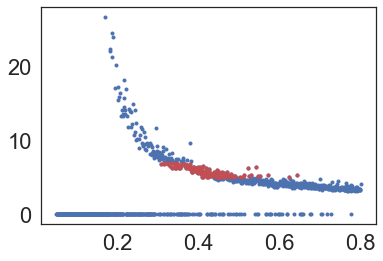

In [245]:
plt.plot(processed['Base_Infectivity'], processed['doubling_time'], '.')
cut = processed['doubling_time'].between(5, 7)
plt.plot(processed['Base_Infectivity'].loc[cut], processed['doubling_time'].loc[cut], 'r.')

0.20224719101123595

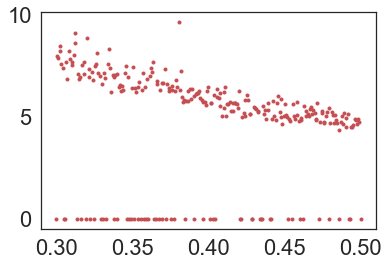

In [248]:
cut = processed['Base_Infectivity'].between(.3, .5)
plt.plot(processed['Base_Infectivity'].loc[cut], processed['doubling_time'].loc[cut], 'r.')

#How many times does the importation fail to take off?
sum(processed['doubling_time'].loc[cut].between(-1, 1))/sum(cut)

In [176]:
z = processed['New Infections'].apply(lambda x: np.sum(x[15:60]))
z2 = processed['Cumulative Infections'].apply(lambda x: np.polyfit([i for i in range(45)], np.log2(x[15:60]+1), deg=1)[0])

In [177]:
z2[20]

0.42209211249064554

(0, 1)

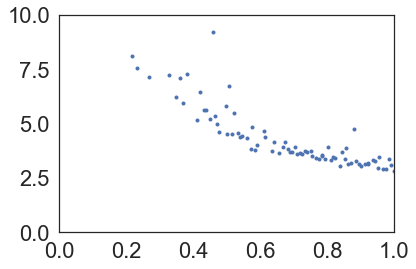

In [194]:
ax = plt.plot(processed['Base_Infectivity'], 1/z2, '.')
plt.ylim(0, 10)
plt.xlim(0, 1)

(0, 1)

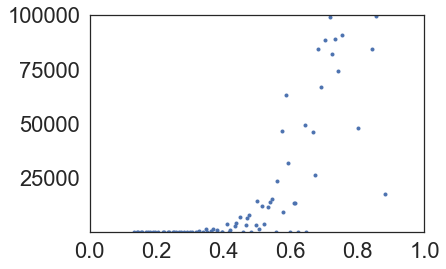

In [201]:
plt.plot(processed['Base_Infectivity'], processed['Cumulative Infections'].apply(lambda x: x[72]), '.')
plt.ylim(1, 100000)
plt.xlim(0, 1)

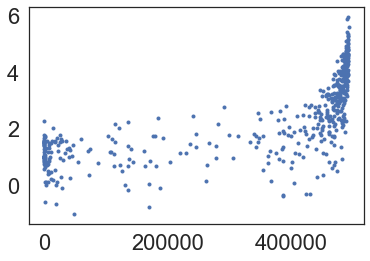

In [156]:
plt.plot(z, z2, '.')

In [157]:
row = processed.iloc[100]

In [162]:
np.argmax(row['Cumulative Infections']>20000)

56

In [170]:
t = [i for i in range(56-15)]
p = np.polyfit([i for i in range(56-15)], np.log2(row['Cumulative Infections'][15:56]+1), deg = 1)

In [168]:
p

array([  237.31428571, -2679.43205575])

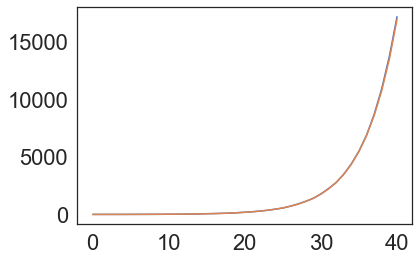

In [173]:
plt.plot(row['Cumulative Infections'][15:56])
plt.plot(t, 2**np.polyval(p,t))

In [174]:
p

array([0.32607753, 1.00657165])

In [175]:
1/p[0]

3.0667553428203984